In [12]:
import numpy as np
from tqdm import tqdm, tqdm_notebook
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
RANDOM_STATE = 44

In [13]:
class LogisticRegression:
    """Logistic Regression
    """
    
    def __init__(self, num_iterations, learning_rate=0.1):
        self.num_iterations = num_iterations
        self.learning_rate = learning_rate
        self.w = None
        self.b = None
        
    @staticmethod
    def sigmoid(x):
        return 1.0 / (1.0 + np.exp(-x))
    
    def fit(self, X, y, return_training_history=False):
        """Fit method
        
        `y` must a one-dimensional Numpy array consisting only of 0 and 1
        """
        # --- input check ---
        if not X.ndim == 2:
            raise ValueError("`X` must be a 2 dimensional Numpy array")
        
        if not y.ndim == 1:
            raise ValueError("`y` must be 1 dimensional Numpy array")
            
        y = y.reshape(-1, 1)
            
        # --- initialize params ---
        self.w = np.random.rand(X.shape[1], 1) * 2 - 1.0
        self.b = np.random.rand(1, 1) * 2 - 1.0
        if return_training_history is True:
            w_history = list()
            b_history = list()
        
        # --- fit ---
        for i in tqdm_notebook(range(self.num_iterations)):
            # forward
            y_pred = self.predict(X)
            
            # backward (update model params)
            # - calculate grads
            w_grad = np.mean(-1 * (y - y_pred) * X, axis=0, keepdims=True).T
            b_grad = np.mean(-1 * (y - y_pred), axis=0, keepdims=True)
            # - update params
            self.w = self.w - self.learning_rate * w_grad
            self.b = self.b - self.learning_rate * b_grad  
            # - record
            if return_training_history is True:
                w_history.append(self.w)
                b_history.append(self.b)
        
        if return_training_history is True:
            return w_history, b_history
    
    def predict(self, x):
        # --- input check ---
        if not x.ndim == 2:
            raise ValueError("`x` must be a 2 dimensional Numpy array. \
                                If it is only a single sample, please reshape it via x.reshape(1, -1)")
        
        # --- predict ---
        y = np.matmul(x, self.w) + self.b
        y = self.sigmoid(y)
        return y

In [14]:
X, y = make_classification(n_samples=100, 
                           n_features=2, 
                           n_redundant=0, 
                           n_clusters_per_class=2, 
                           class_sep=1.5, 
                           random_state=RANDOM_STATE)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (80, 2)
X_test.shape: (20, 2)
y_train.shape: (80,)
y_test.shape: (20,)


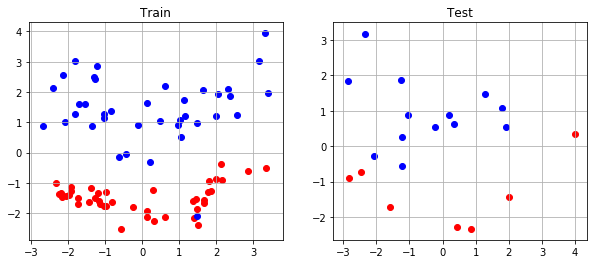

In [49]:
# Plot
fig = plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1); visualize_points(X_train, y_train, title='Train')
plt.subplot(1, 2, 2); visualize_points(X_test, y_test, title='Test')

In [50]:
model = LogisticRegression(num_iterations=50, learning_rate=0.1)

In [51]:
hist = model.fit(X, y, return_training_history=True)

In [55]:
arr = hist[0][0]

In [56]:
arr

array([[-0.37506806],
       [-0.81139147]])

In [8]:
y_pred = model.predict(X)

In [9]:
y

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1])